In [1]:
#!python3 -m venv venv
#!source venv/bin/activate
#!pip install numpy pandas matplotlib seaborn nbformat ffmpeg


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import pylab
import seaborn as sns
import graphviz


In [3]:
SEA_training_data = pd.read_csv(
    "artificial/sea/SEA_training_data.csv", names=["x", "y", "z"], header=None)
SEA_training_class = pd.read_csv(
    "artificial/sea/SEA_training_class.csv", names=["class"], header=None)
sea = SEA_training_data
sea["class"] = SEA_training_class["class"]
sea.to_csv("artificial/sea/sea.csv", index=False)


In [ ]:
'''
#!pip install plotly
import plotly.express as px
sea["size"] = [0.1]*len(sea)
fig = px.scatter_3d(sea[0:1000], x="x", y="y", z="z", color="class", size = "size")

fig.show()
'''


In [ ]:
'''
sns.pairplot(sea, hue="class")
'''


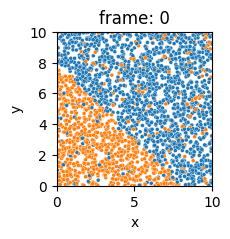

In [37]:
points = 2500
expected_time = 5000
df_len = len(sea)
_frames = 20
_interval = int(expected_time/_frames)
step = int((df_len-points)/_frames)

fig, ax = plt.subplots()
fig.set()
fig.set_figheight(2)
fig.set_figwidth(2)


def animate(i):
    plt.clf()
    plt.title("frame: "+str(i))
    ax = sns.scatterplot(sea[i*step:i*step+points],
                         x="x", y="y", hue="class", s=8.0)
    ax.set(xlim=(0, 10), ylim=(0, 10))
    ax.legend([], [], frameon=False)


ani = animation.FuncAnimation(
    fig, animate, frames=_frames, interval=_interval, repeat=True)

writer = animation.PillowWriter(fps=5)
ani.save('images/sea_drift.gif', writer=writer)


In [ ]:
#!sudo apt install rustc cargo
#!pip install git+https: // github.com/online-ml/river - -upgrade

In [18]:
import functools
from river import stream
from river import evaluate
from river import metrics
from river import neighbors
from river import preprocessing
from river import utils

params = {
    'converters': {'x': float, 'y': float, 'z': float},
    'target': 'class'
}

dataset = stream.iter_csv("artificial/sea/sea.csv", **params)

dist = functools.partial(utils.math.minkowski_distance, p=3)

model = (
     preprocessing.StandardScaler() |
     neighbors.KNNClassifier(
         engine=neighbors.SWINN(
             dist_func=dist,
             seed=42
         )
     )
 )

evaluate.progressive_val_score(dataset, model, metrics.Accuracy())

Accuracy: 86.12%

In [ ]:
metrics.roc_auc()

In [7]:
import pandas as pd

df = pd.read_csv("artificial/sea/sea.csv")

In [16]:
df[df["class"] == 1].shape[0]/df.shape[0]

0.38096